<a href="https://colab.research.google.com/github/arashkhgit/Snapp/blob/main/SnappBOX!_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

chunk_size = 10000
data_chunks = pd.read_csv('/content/dataset_orders.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)


# Data Cleaning and Preprocessing:



*   Handle missing data: Identify missing values and decide how to deal with them (e.g., impute, drop, or leave as-is).
*   Remove duplicate records, if any, to avoid skewing analysis results.
*   Address data inconsistencies, such as spelling errors, capitalization, or data entry mistakes.
*   Handle outliers if they exist and could influence the analysis.








### Step 1: Data Examination

In [10]:
# Check the basic information of the data
print("Step 1: Data Information")
print(data.info())

Step 1: Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375068 entries, 0 to 375067
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      375068 non-null  int64  
 1   create_time   375068 non-null  object 
 2   category      375068 non-null  object 
 3   city          375068 non-null  object 
 4   customer_id   375068 non-null  int64  
 5   price         375068 non-null  int64  
 6   distance      375068 non-null  float64
 7   status        375068 non-null  object 
 8   cancelled_by  164657 non-null  object 
 9   biker_id      255525 non-null  float64
 10  accept_time   375068 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.5+ MB
None


### Step 2: Missing Value Analysis

In [11]:
# Check for missing values in each column
print("\nStep 2: Missing Values")
missing_values = data.isnull().sum()
print(missing_values)


Step 2: Missing Values
order_id             0
create_time          0
category             0
city                 0
customer_id          0
price                0
distance             0
status               0
cancelled_by    210411
biker_id        119543
accept_time          0
dtype: int64


### Step 2.1: Check for data duplication

In [12]:
# Check for data duplication
print("\nStep 3: Data Duplication Check")
duplicated_rows = data.duplicated()
duplicated_count = duplicated_rows.sum()
print("Number of duplicated rows:", duplicated_count)


Step 3: Data Duplication Check
Number of duplicated rows: 0


### Step 3: Data Cleaning

In [44]:
# Step 3.1: Convert date columns to proper datetime format
data['create_time'] = pd.to_datetime(data['create_time'])
data['accept_time'] = pd.to_datetime(data['accept_time'])

# Step 3.2: Convert 'price' and 'Distance' columns to numeric (if they contain numeric values)
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')

# Step 3.3: Handle missing values in 'biker_id'
# Since 'biker_id' is empty when the order is not accepted, let's fill it with a more appropriate value, such as 'NOT_ACCEPTED'
data['biker_id'].fillna('NOT_ACCEPTED', inplace=True)

# Step 3.4: Handle missing values in 'cancelled_by'
# Fill missing values in 'cancelled_by' with "UNKNOWN"
data['cancelled_by'].fillna("UNKNOWN", inplace=True)

### Step 4: Data Preprocessing

In [45]:
# Step 4.1: Convert text columns to lowercase
data['category'] = data['category'].str.lower()
data['city'] = data['city'].str.lower()
data['status'] = data['status'].str.lower()
data['cancelled_by'] = data['cancelled_by'].str.lower()

# Step 4.2: Remove duplicate rows, if any
data.drop_duplicates(inplace=True)

# Step 4.3: Convert 'order_id', 'customer_id', and 'biker_id' to integers
data['order_id'] = data['order_id'].astype(int)
data['customer_id'] = data['customer_id'].astype(int)

In [46]:
missing_values = data.isnull().sum()
print(missing_values)

order_id        0
create_time     0
category        0
city            0
customer_id     0
price           0
distance        0
status          0
cancelled_by    0
biker_id        0
accept_time     0
dtype: int64


### Step 4: Exploratory Data Analysis (EDA)

# Univariate Analysis

Descriptive Statistics for Numerical Variables:
              price       distance
count  3.750680e+05  375068.000000
mean   1.615349e+05       9.116743
std    1.772371e+05       8.932254
min    1.000000e+04      -0.000300
25%    6.000000e+04       3.461000
50%    1.000000e+05       6.844000
75%    1.900000e+05      12.045400
max    4.395000e+06     345.040000


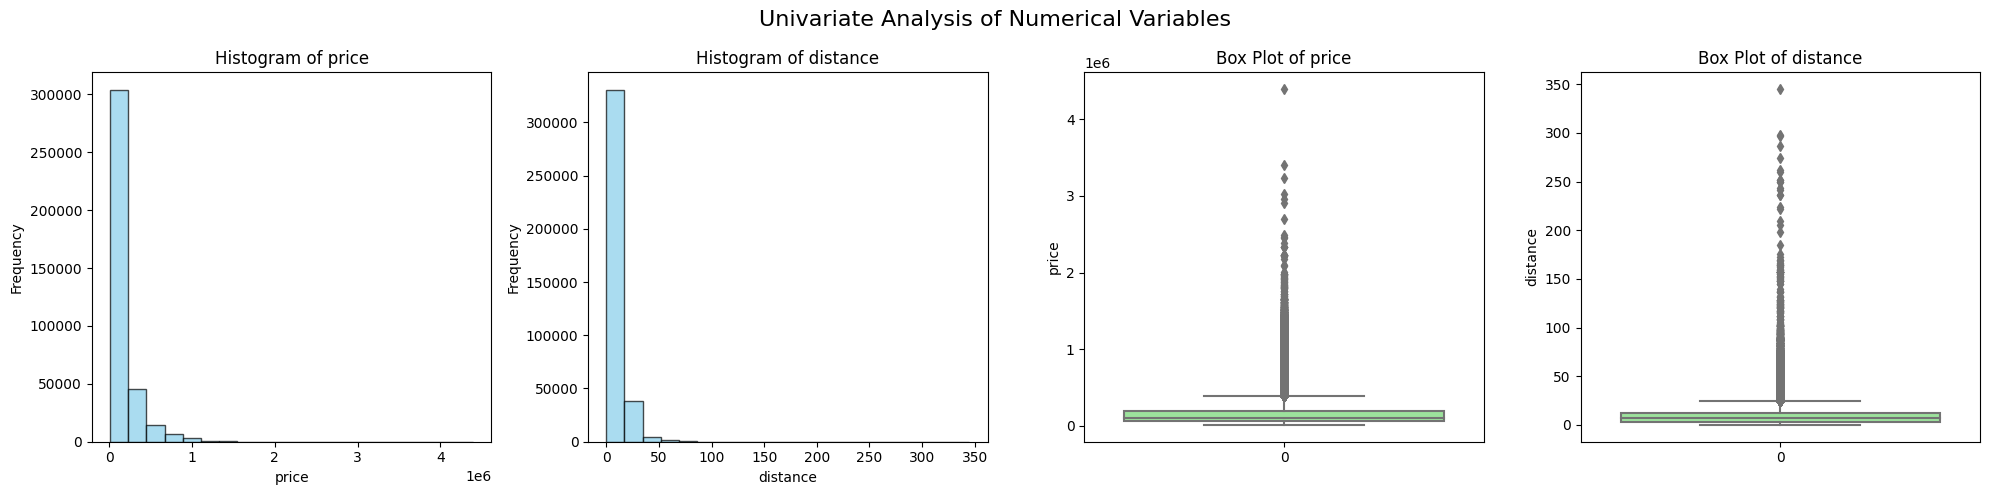

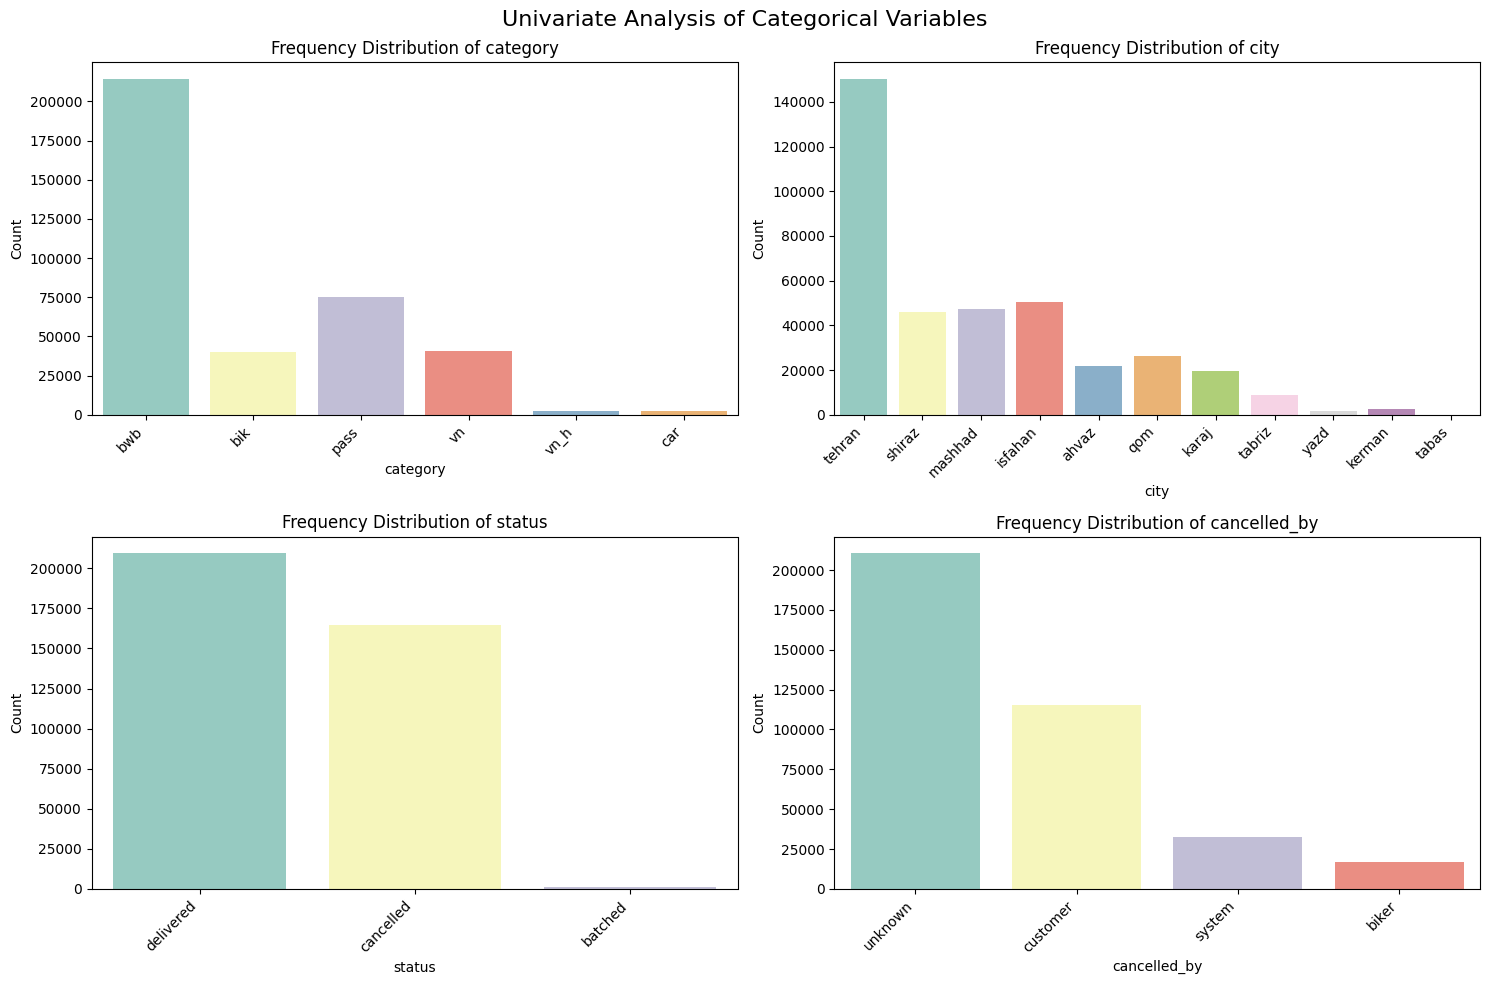

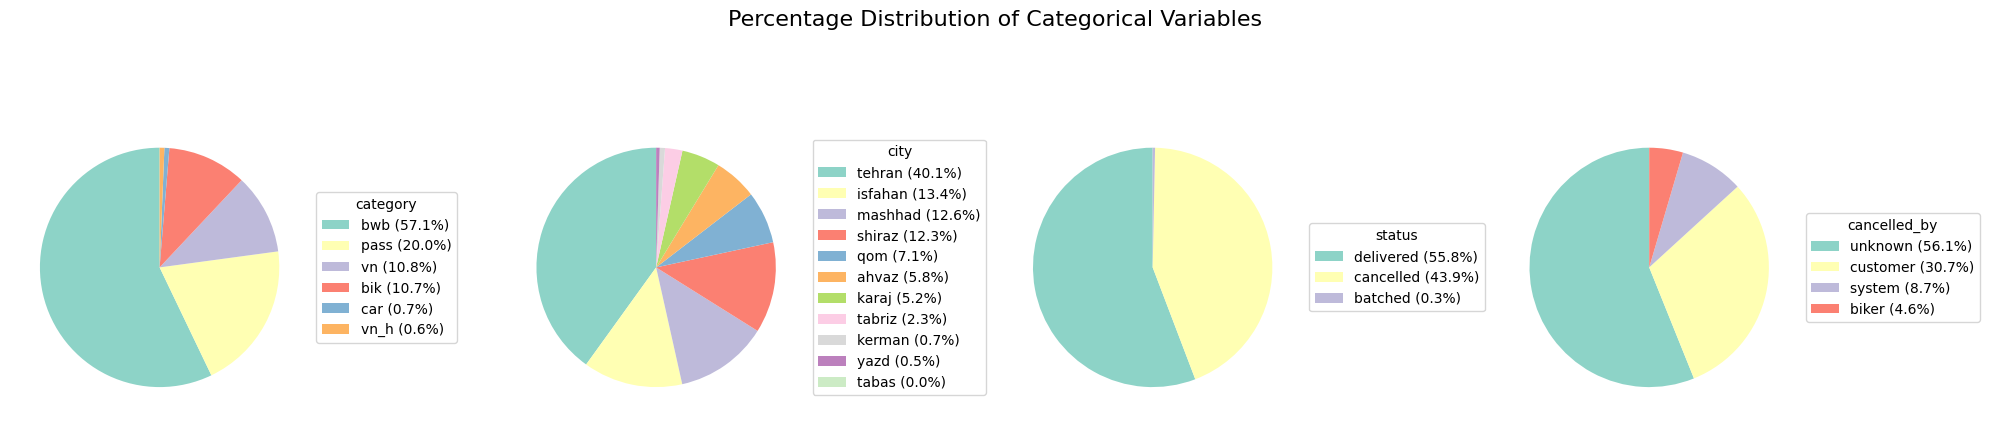

In [16]:
# Step 1: Numerical Variables - Descriptive Statistics and Visualization
numerical_columns = ['price', 'distance']

# Descriptive Statistics
numerical_stats = data[numerical_columns].describe()
print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)

# Visualization - Histograms and Box Plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Univariate Analysis of Numerical Variables", fontsize=16)

for i, column in enumerate(numerical_columns):
    # Histogram
    axes[i].hist(data[column], bins=20, edgecolor='black', color='skyblue', alpha=0.7)
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

    # Box Plot
    sns.boxplot(data=data[column], ax=axes[i + 2], orient='v', color='lightgreen')
    axes[i + 2].set_title(f"Box Plot of {column}")
    axes[i + 2].set_ylabel(column)

plt.tight_layout()
plt.show()

# Step 2: Categorical Variables - Frequency Distribution Visualization
categorical_columns = ['category', 'city', 'status', 'cancelled_by']

# Visualization - Bar Charts
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Univariate Analysis of Categorical Variables", fontsize=16)

for i, column in enumerate(categorical_columns):
    # Bar Chart
    sns.countplot(data=data, x=column, palette='Set3', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Frequency Distribution of {column}")
    axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right')
    axes[i // 2, i % 2].set_xlabel(column)
    axes[i // 2, i % 2].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Step 3: Categorical Variables - Pie Charts with Percentage in Legend
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Percentage Distribution of Categorical Variables", fontsize=16)

for i, column in enumerate(categorical_columns):
    # Pie Chart
    value_counts = data[column].value_counts()
    wedges, _, autotexts = axes[i].pie(value_counts, autopct='', startangle=90, colors=sns.color_palette('Set3'))
    axes[i].set_title("")  # Remove title from the pie chart

    # Calculate percentage for each category
    total_count = sum(value_counts)
    percentages = [f'{100 * count / total_count:.1f}%' for count in value_counts]

    # Legend with category names and percentage
    axes[i].legend(wedges, [f'{name} ({percentage})' for name, percentage in zip(value_counts.index, percentages)],
                   title=column, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Bivariate Analysis

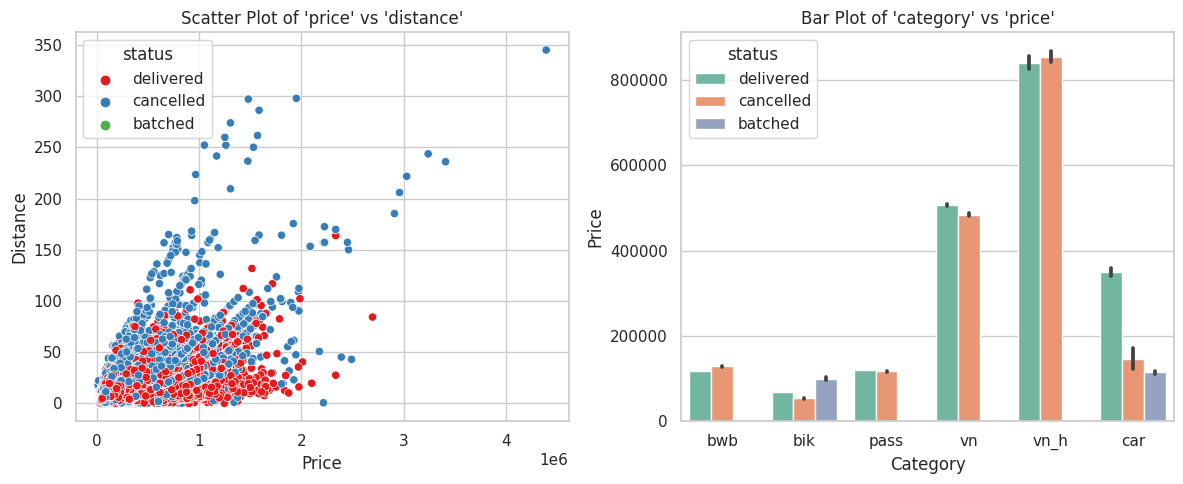

In [17]:
# Bivariate Analysis with Scatter Plots and Bar Plots
sns.set(style='whitegrid', context='notebook')

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter Plot between 'price' and 'distance'
sns.scatterplot(x='price', y='distance', data=data, hue='status', palette='Set1', marker='o', ax=axes[0])
axes[0].set_title("Scatter Plot of 'price' vs 'distance'")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Distance")

# Bar Plot of 'category' vs 'price'
sns.barplot(x='category', y='price', data=data, hue='status', palette='Set2', ax=axes[1])
axes[1].set_title("Bar Plot of 'category' vs 'price'")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Price")

# Adjust the layout to prevent overlapping of titles
plt.tight_layout()

# Show the plots
plt.show()

# Multivariate Analysis

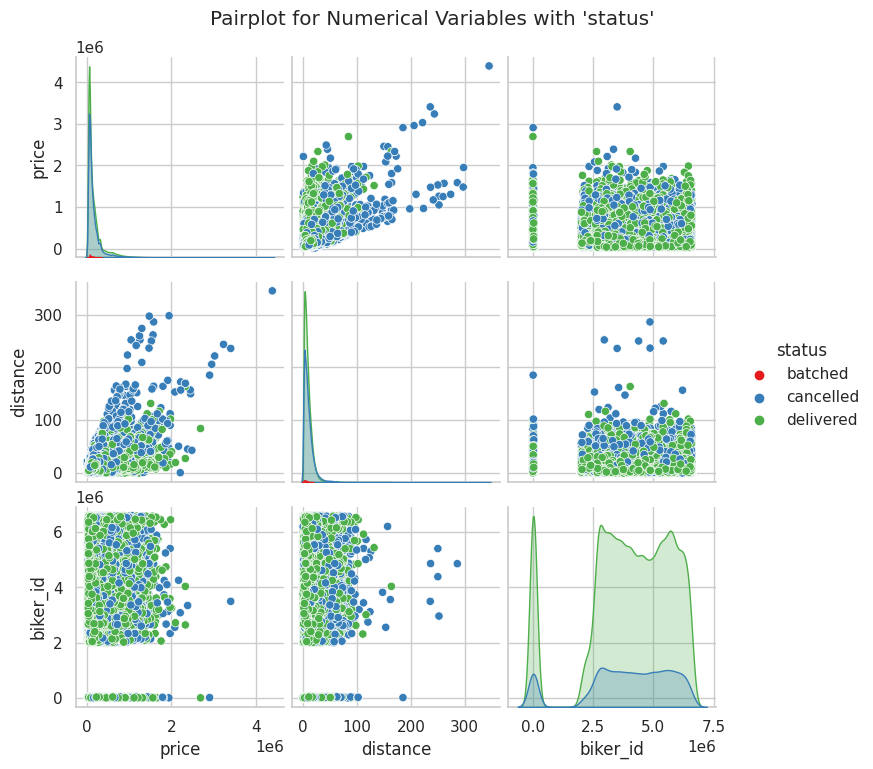

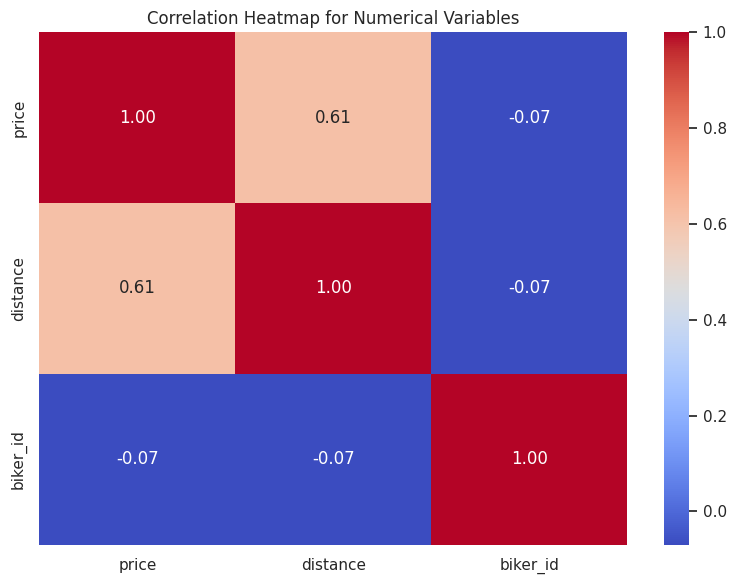

In [26]:
# Set Seaborn style
sns.set(style='whitegrid', context='notebook')

# Fill non-numeric values in 'biker_id' with NaN
data['biker_id'] = pd.to_numeric(data['biker_id'], errors='coerce')

# Pairplot for numerical variables
numerical_vars = ['price', 'distance', 'biker_id']
sns.pairplot(data[numerical_vars + ['status']], hue='status', palette='Set1')
plt.suptitle("Pairplot for Numerical Variables with 'status'", y=1.02)

# Heatmap for correlation
correlation_matrix = data[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Numerical Variables")

plt.tight_layout()

# Show the plots
plt.show()

In [27]:
# Step 4.1: Summary Statistics
print("\nStep 4.1: Summary Statistics")
print(data.describe())

# Step 4.2: Category-wise Analysis
print("\nStep 4.2: Category-wise Analysis")
category_counts = data['category'].value_counts()
print(category_counts)

# Step 4.3: City-wise Analysis
print("\nStep 4.3: City-wise Analysis")
city_counts = data['city'].value_counts()
print(city_counts)

# Step 4.4: Status-wise Analysis
print("\nStep 4.4: Status-wise Analysis")
status_counts = data['status'].value_counts()
print(status_counts)

# Step 4.5: Cancellation Reasons Analysis
print("\nStep 4.5: Cancellation Reasons Analysis")
cancelled_by_counts = data['cancelled_by'].value_counts()
print(cancelled_by_counts)

# Step 4.6: Price and Distance Analysis
print("\nStep 4.6: Price and Distance Analysis")
print("Average Price:", data['price'].mean())
print("Maximum Price:", data['price'].max())
print("Minimum Price:", data['price'].min())
print("Average Distance:", data['distance'].mean())
print("Maximum Distance:", data['distance'].max())
print("Minimum Distance:", data['distance'].min())


Step 4.1: Summary Statistics
           order_id   customer_id         price       distance      biker_id
count  3.750680e+05  3.750680e+05  3.750680e+05  375068.000000  2.555250e+05
mean   8.999800e+07  7.120808e+05  1.615349e+05       9.116743  4.006649e+06
std    5.778507e+06  2.005503e+06  1.772371e+05       8.932254  1.765568e+06
min    8.000106e+07  1.000000e+00  1.000000e+04      -0.000300  1.014000e+03
25%    8.498805e+07  1.000000e+00  6.000000e+04       3.461000  3.028546e+06
50%    8.999131e+07  1.000000e+00  1.000000e+05       6.844000  4.169880e+06
75%    9.501505e+07  2.000000e+00  1.900000e+05      12.045400  5.417956e+06
max    1.000009e+08  7.999915e+06  4.395000e+06     345.040000  6.600922e+06

Step 4.2: Category-wise Analysis
bwb     214233
pass     75097
vn       40675
bik      40175
car       2492
vn_h      2396
Name: category, dtype: int64

Step 4.3: City-wise Analysis
tehran     150241
isfahan     50428
mashhad     47250
shiraz      46049
qom         26496
ahva

### Step 5: Data Visualization

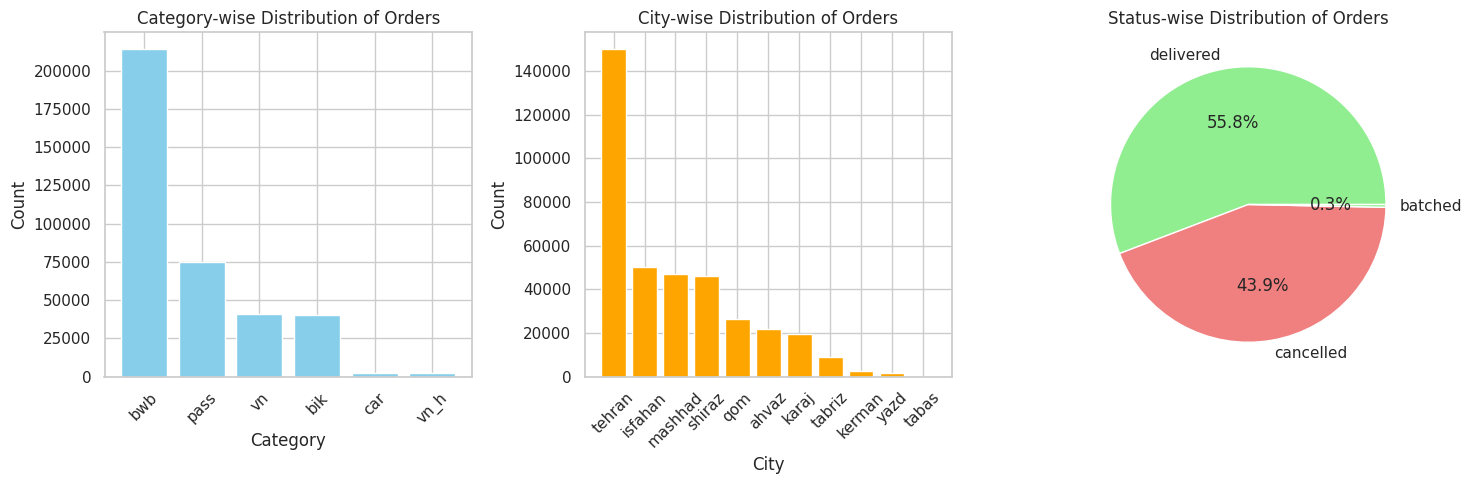

In [28]:
# Calculate Category-wise counts
category_counts = data['category'].value_counts()

# Calculate City-wise counts
city_counts = data['city'].value_counts()

# Calculate Status-wise counts
status_counts = data['status'].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Category-wise Bar Plot
axs[0].bar(category_counts.index, category_counts.values, color='skyblue')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Category-wise Distribution of Orders')
axs[0].tick_params(axis='x', rotation=45)

# City-wise Bar Plot
axs[1].bar(city_counts.index, city_counts.values, color='orange')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Count')
axs[1].set_title('City-wise Distribution of Orders')
axs[1].tick_params(axis='x', rotation=45)

# Status Pie Chart
axs[2].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axs[2].set_title('Status-wise Distribution of Orders')

# Adjust layout and display the combined chart
plt.tight_layout()
plt.show()


<ipython-input-29-5a99fc297238>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


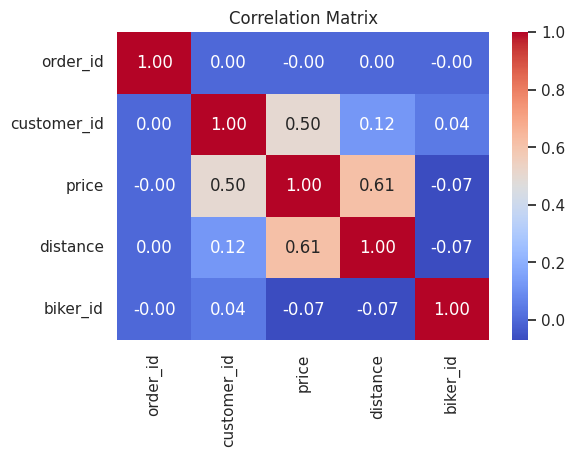

In [29]:
# Correlation Matrix and Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Step 6: Data validation

Data validation is a critical step to ensure that the data cleaning and preprocessing have been performed correctly and that the data meets quality standards. In this process, we will cross-check the preprocessed data against the original data or known data to verify its correctness. Let's perform data validation for your preprocessed data:

In [48]:
# Step 0: Load the original data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/dataset_orders.csv', chunksize=chunk_size)
original_data = pd.concat(data_chunks)

# Save the preprocessed data to a CSV file
data.to_csv('/content/preprocessed_data.csv', index=False)

# Read the preprocessed data from the saved CSV file
preprocessed_data = pd.read_csv('/content/preprocessed_data.csv')

In [51]:
# Step 6.1: Compare the number of rows in original and preprocessed data
original_rows, original_cols = original_data.shape
preprocessed_rows, preprocessed_cols = preprocessed_data.shape

if original_rows == preprocessed_rows:
    print("Step 6.1: Number of rows in original and preprocessed data match.")
else:
    print("Step 6.1: Number of rows in original and preprocessed data do not match. Check for potential issues.")

# Step 6.2: Compare the columns in original and preprocessed data
original_columns = set(original_data.columns)
preprocessed_columns = set(preprocessed_data.columns)

if original_columns == preprocessed_columns:
    print("Step 6.2: Columns in original and preprocessed data match.")
else:
    print("Step 6.2: Columns in original and preprocessed data do not match. Check for potential issues.")

# Step 6.3: Check for any missing values in preprocessed data
missing_values_preprocessed = preprocessed_data.isnull().sum().sum()

if missing_values_preprocessed == 0:
    print("Step 6.3: No missing values in the preprocessed data.")
else:
    print(f"Step 6.3: Preprocessed data contains {missing_values_preprocessed} missing values.")

# Step 6.4: Verify data transformation and cleaning results for specific columns
# (You can cross-check specific columns if needed)

# Example: Verify the uniqueness of 'order_id' in the preprocessed data
if preprocessed_data['order_id'].nunique() == preprocessed_rows:
    print("Step 6.4: 'order_id' is unique in the preprocessed data.")
else:
    print("Step 6.4: 'order_id' is not unique in the preprocessed data. Check for potential issues.")


Step 6.1: Number of rows in original and preprocessed data match.
Step 6.2: Columns in original and preprocessed data match.
Step 6.3: Preprocessed data contains 119543 missing values.
Step 6.4: 'order_id' is unique in the preprocessed data.


# Data Analysis Plan
*   Define our objectve and questions
*   Plan the analysis process and the techniques




**Our first objective is that find "Average order Time for Each Category"**  :

In [35]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Calculate the average time for each category

# Convert 'create_time' and 'accept_time' to datetime objects
data['create_time'] = pd.to_datetime(data['create_time'])
data['accept_time'] = pd.to_datetime(data['accept_time'])

# Filter out rows where 'accept_time' is before 'create_time'
valid_data = data[data['accept_time'] >= data['create_time']].copy()

# Calculate the time difference between 'create_time' and 'accept_time' in minutes for valid data
valid_data['time_difference'] = (valid_data['accept_time'] - valid_data['create_time']).dt.total_seconds() / 60

# Group the valid data by 'category' and calculate the average time difference for each category
average_time_per_category = valid_data.groupby('category')['time_difference'].mean()

# Convert the average time in minutes to minutes and seconds format
average_time_per_category = pd.to_datetime(average_time_per_category, unit='m').dt.strftime('%M:%S')

print("Average order Time for Each Category (minutes:seconds):")
print(average_time_per_category)

Average order Time for Each Category (minutes:seconds):
category
bik     03:11
bwb     00:56
car     04:45
pass    00:40
vn      01:11
vn_h    01:59
Name: time_difference, dtype: object


**The next objective is to plot the trend of Delivered orders in hourly and and daily unit if time.**

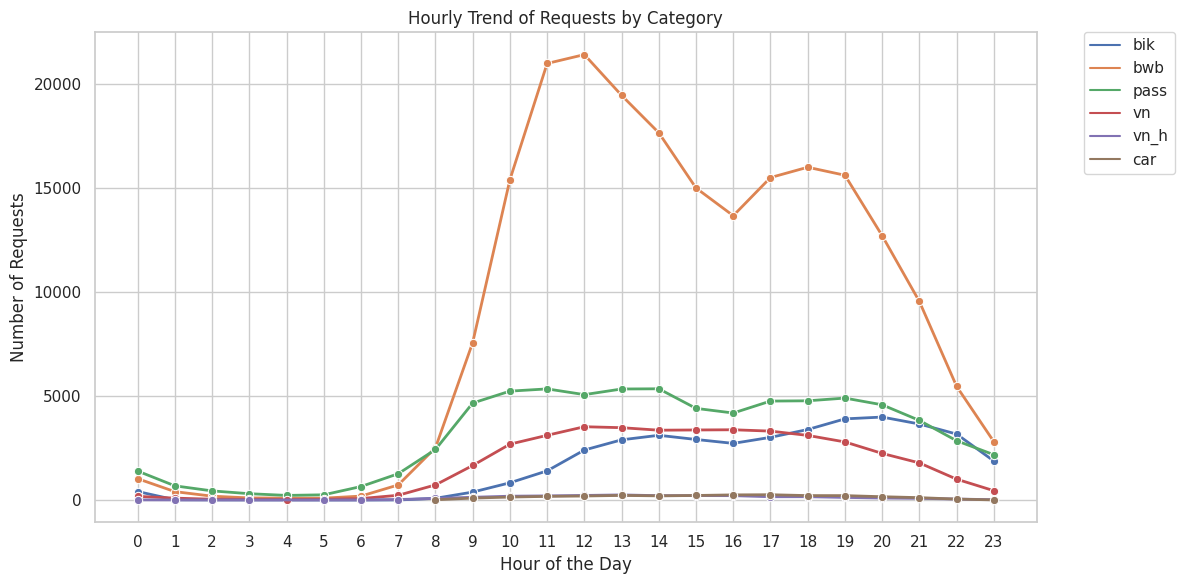

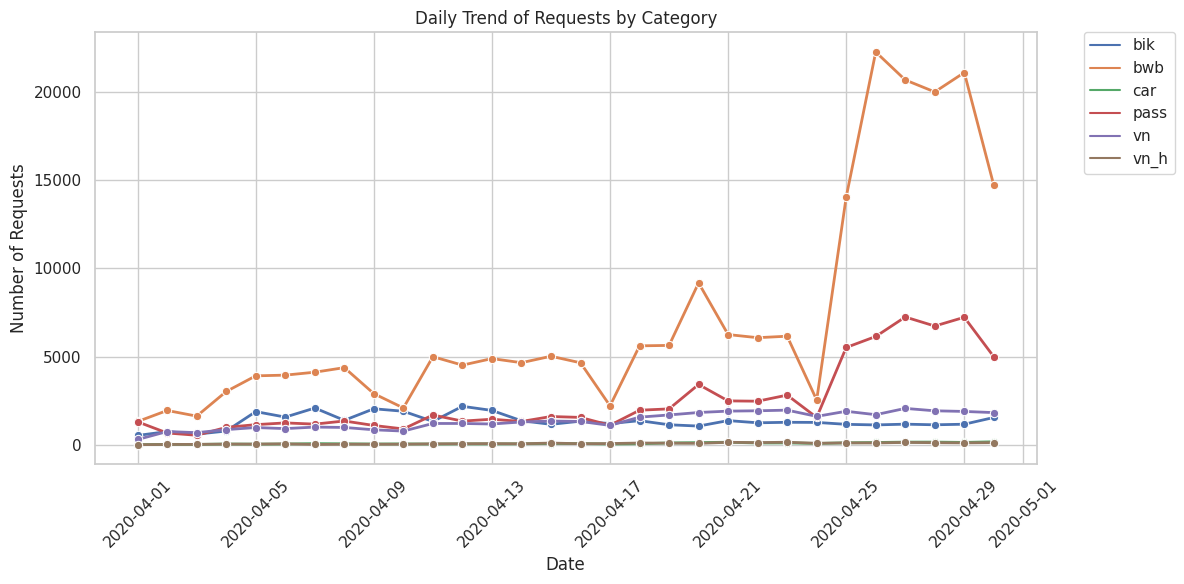

In [77]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Data Preparation for Hourly Trend Plot

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Extract hour from 'create_time' to create a new 'hour' column
data['hour'] = data['create_time'].dt.hour

# Step 3: Data Preparation for Daily Trend Plot

# Extract date from 'create_time' to create a new 'date' column
data['date'] = data['create_time'].dt.date

# Step 4: Hourly Trend Plot

# Group the data by 'hour' and 'category' to get the count of requests for each hour in each category
hourly_count_per_category = data.groupby(['hour', 'category']).size().reset_index(name='count')

# Plot the hourly trend for each category
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_count_per_category, x='hour', y='count', hue='category', marker='o', linewidth=2)
plt.title('Hourly Trend of Requests by Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(range(24))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Step 5: Daily Trend Plot

# Group the data by 'date' and 'category' to get the count of requests for each day in each category
daily_count_per_category = data.groupby(['date', 'category']).size().reset_index(name='count')

# Plot the daily trend for each category
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_count_per_category, x='date', y='count', hue='category', marker='o', linewidth=2)
plt.title('Daily Trend of Requests by Category')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [36]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Data Preparation for Hourly Trend Plot

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Extract hour from 'create_time' to create a new 'hour' column
data['hour'] = data['create_time'].dt.hour

# Step 3: Data Preparation for Daily Trend Plot

# Extract date from 'create_time' to create a new 'date' column
data['date'] = data['create_time'].dt.date

# Step 4: Hourly Trend Outlier Detection (Z-score method)

hourly_count_per_category = data.groupby(['hour', 'category']).size().reset_index(name='count')

# Calculate Z-score for 'count' column within each category
hourly_count_per_category['z_score'] = (hourly_count_per_category.groupby('category')['count']
                                       .transform(lambda x: (x - x.mean()) / x.std()))

# Identify potential outliers with Z-score > 3 or Z-score < -3
hourly_outliers_zscore = hourly_count_per_category[(hourly_count_per_category['z_score'] > 3) |
                                                   (hourly_count_per_category['z_score'] < -3)]

print("Hourly Trend Outliers (Z-score method):")
print(hourly_outliers_zscore)

# Step 5: Daily Trend Outlier Detection (Z-score method)

daily_count_per_category = data.groupby(['date', 'category']).size().reset_index(name='count')

# Calculate Z-score for 'count' column within each category
daily_count_per_category['z_score'] = (daily_count_per_category.groupby('category')['count']
                                      .transform(lambda x: (x - x.mean()) / x.std()))

# Identify potential outliers with Z-score > 3 or Z-score < -3
daily_outliers_zscore = daily_count_per_category[(daily_count_per_category['z_score'] > 3) |
                                                 (daily_count_per_category['z_score'] < -3)]

print("Daily Trend Outliers (Z-score method):")
print(daily_outliers_zscore)

# Step 6: Hourly Trend Outlier Detection (IQR method)

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for 'count' within each category
hourly_summary_iqr = (hourly_count_per_category.groupby('category')['count']
                      .agg(['quantile', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
                      .rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3', 'quantile': 'median'}))

# Calculate the lower and upper bounds for potential outliers
hourly_summary_iqr['lower_bound'] = hourly_summary_iqr['Q1'] - 1.5 * (hourly_summary_iqr['Q3'] - hourly_summary_iqr['Q1'])
hourly_summary_iqr['upper_bound'] = hourly_summary_iqr['Q3'] + 1.5 * (hourly_summary_iqr['Q3'] - hourly_summary_iqr['Q1'])

# Identify potential outliers based on the bounds
hourly_outliers_iqr = pd.merge(hourly_count_per_category, hourly_summary_iqr[['lower_bound', 'upper_bound']],
                              on='category', how='left')
hourly_outliers_iqr = hourly_outliers_iqr[
    (hourly_outliers_iqr['count'] < hourly_outliers_iqr['lower_bound']) |
    (hourly_outliers_iqr['count'] > hourly_outliers_iqr['upper_bound'])
]

print("Hourly Trend Outliers (IQR method):")
print(hourly_outliers_iqr)

# Step 7: Daily Trend Outlier Detection (IQR method)

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for 'count' within each category
daily_summary_iqr = (daily_count_per_category.groupby('category')['count']
                     .agg(['quantile', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
                     .rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3', 'quantile': 'median'}))

# Calculate the lower and upper bounds for potential outliers
daily_summary_iqr['lower_bound'] = daily_summary_iqr['Q1'] - 1.5 * (daily_summary_iqr['Q3'] - daily_summary_iqr['Q1'])
daily_summary_iqr['upper_bound'] = daily_summary_iqr['Q3'] + 1.5 * (daily_summary_iqr['Q3'] - daily_summary_iqr['Q1'])

# Identify potential outliers based on the bounds
daily_outliers_iqr = pd.merge(daily_count_per_category, daily_summary_iqr[['lower_bound', 'upper_bound']],
                             on='category', how='left')
daily_outliers_iqr = daily_outliers_iqr[
    (daily_outliers_iqr['count'] < daily_outliers_iqr['lower_bound']) |
    (daily_outliers_iqr['count'] > daily_outliers_iqr['upper_bound'])
]

print("Daily Trend Outliers (IQR method):")
print(daily_outliers_iqr)


Hourly Trend Outliers (Z-score method):
Empty DataFrame
Columns: [hour, category, count, z_score]
Index: []
Daily Trend Outliers (Z-score method):
Empty DataFrame
Columns: [date, category, count, z_score]
Index: []
Hourly Trend Outliers (IQR method):
Empty DataFrame
Columns: [hour, category, count, z_score, lower_bound, upper_bound]
Index: []
Daily Trend Outliers (IQR method):
           date category  count   z_score  lower_bound  upper_bound
0    2020-04-01      bik    535 -1.927950      596.000     2060.000
36   2020-04-07      bik   2086  1.790496      596.000     2060.000
66   2020-04-12      bik   2183  2.023049      596.000     2060.000
145  2020-04-25      bwb  14029  1.092059    -1222.375    10686.625
147  2020-04-25     pass   5513  1.459249    -1122.250     5049.750
151  2020-04-26      bwb  22238  2.393576    -1222.375    10686.625
153  2020-04-26     pass   6135  1.760818    -1122.250     5049.750
157  2020-04-27      bwb  20654  2.142436    -1222.375    10686.625
159  202

# Next Objective :
we want to predict the number of orders (DELIVERED) in the future.
How many trips will we have on each day of the first week
of May?

# ARIMA

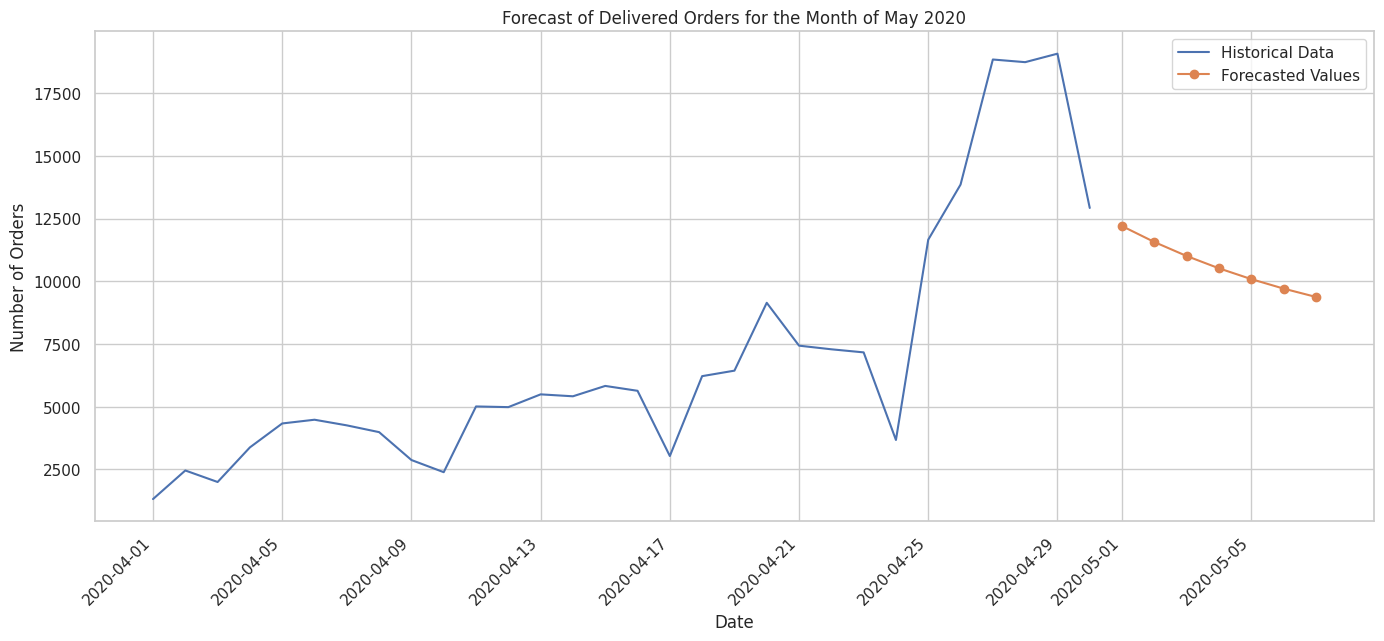

Forecasted Number of Orders for the Month of May 2020:
2020-05-01    12197.212370
2020-05-02    11562.308973
2020-05-03    11004.603905
2020-05-04    10514.710569
2020-05-05    10084.383693
2020-05-06     9706.380549
2020-05-07     9374.339061
Freq: D, Name: predicted_mean, dtype: float64


In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the ARIMA Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the ARIMA model on the historical data
    try:
        arima_model = ARIMA(historical_data, order=(1, 0, 0))  # You can modify the order as needed
        arima_model_fit = arima_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-7')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained ARIMA model to forecast the number of orders for the month of May 2020
        forecast_values = arima_model_fit.forecast(steps=len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during ARIMA model training:", str(e))




# Seasonal Autoregressive Integrated Moving-Average (SARIMA)
SARIMA is an extension of ARIMA that considers seasonal components in addition to autoregressive and moving-average components. It is useful for time series data with seasonality.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


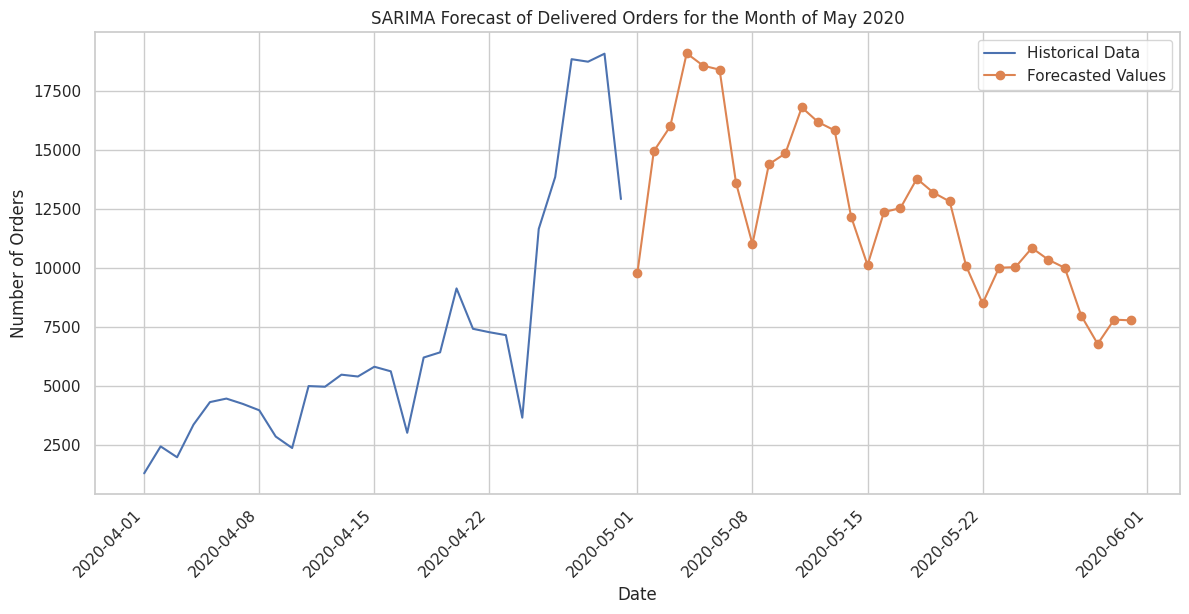

SARIMA Forecasted Number of Orders for the Month of May 2020:
2020-05-01     9792.697543
2020-05-02    14946.004026
2020-05-03    15993.268616
2020-05-04    19084.842035
2020-05-05    18562.582802
2020-05-06    18394.553032
2020-05-07    13606.035020
2020-05-08    11015.328360
2020-05-09    14392.418499
2020-05-10    14849.686367
2020-05-11    16796.951279
2020-05-12    16173.539143
2020-05-13    15824.149964
2020-05-14    12178.643998
2020-05-15    10126.566032
2020-05-16    12370.912650
2020-05-17    12535.032149
2020-05-18    13781.104580
2020-05-19    13195.210957
2020-05-20    12816.990424
2020-05-21    10084.563553
2020-05-22     8504.559069
2020-05-23    10015.181294
2020-05-24    10041.535524
2020-05-25    10851.330664
2020-05-26    10353.721566
2020-05-27    10011.275966
2020-05-28     7985.769475
2020-05-29     6792.177250
2020-05-30     7820.423566
2020-05-31     7788.385383
Freq: D, Name: predicted_mean, dtype: float64


In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the SARIMA Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the SARIMA model on the historical data
    try:
        sarima_model = SARIMAX(historical_data, order=(1, 0, 0), seasonal_order=(1, 0, 0, 7))  # You can modify the order as needed
        sarima_model_fit = sarima_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-31')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained SARIMA model to forecast the number of orders for the month of May 2020
        forecast_values = sarima_model_fit.forecast(steps=len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('SARIMA Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("SARIMA Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during SARIMA model training:", str(e))


# Exponential Smoothing (ETS):
ETS methods are based on weighted averages of past observations to make predictions. They can handle data with or without seasonality and trend.

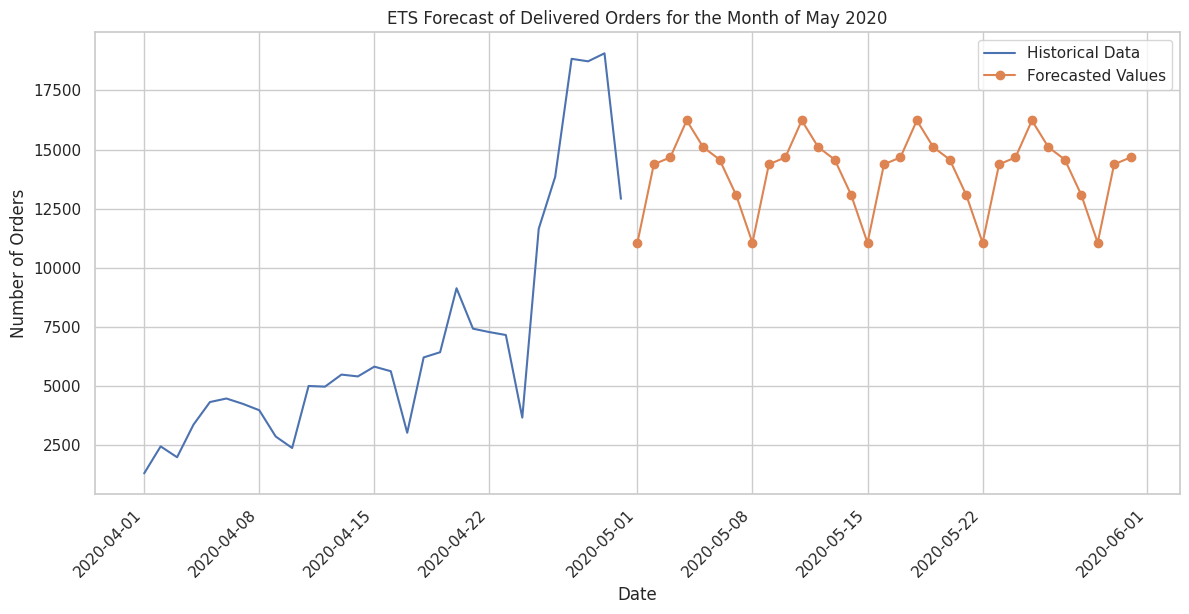

ETS Forecasted Number of Orders for the Month of May 2020:
2020-05-01    11062.372065
2020-05-02    14376.900522
2020-05-03    14670.040792
2020-05-04    16232.011016
2020-05-05    15105.282815
2020-05-06    14577.666625
2020-05-07    13090.607077
2020-05-08    11062.372065
2020-05-09    14376.900522
2020-05-10    14670.040792
2020-05-11    16232.011016
2020-05-12    15105.282815
2020-05-13    14577.666625
2020-05-14    13090.607077
2020-05-15    11062.372065
2020-05-16    14376.900522
2020-05-17    14670.040792
2020-05-18    16232.011016
2020-05-19    15105.282815
2020-05-20    14577.666625
2020-05-21    13090.607077
2020-05-22    11062.372065
2020-05-23    14376.900522
2020-05-24    14670.040792
2020-05-25    16232.011016
2020-05-26    15105.282815
2020-05-27    14577.666625
2020-05-28    13090.607077
2020-05-29    11062.372065
2020-05-30    14376.900522
2020-05-31    14670.040792
Freq: D, dtype: float64


In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the ETS Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the ETS model on the historical data
    try:
        ets_model = ExponentialSmoothing(historical_data, seasonal='add', seasonal_periods=7)
        ets_model_fit = ets_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-31')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained ETS model to forecast the number of orders for the month of May 2020
        forecast_values = ets_model_fit.forecast(len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('ETS Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("ETS Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during ETS model training:", str(e))


Prophet: Prophet is a forecasting library developed by Facebook that is designed to handle time series data with strong seasonality and multiple seasonal components.

Machine Learning Algorithms: You can also explore machine learning algorithms like Random Forests, Gradient Boosting, or LSTM (Long Short-Term Memory) networks, which are capable of learning complex patterns in time series data.

State Space Models: State space models can be used to capture both observed and unobserved components of time series data. Kalman filter-based methods are commonly used in state space models.

Gaussian Processes: Gaussian Processes are a powerful non-parametric approach for time series forecasting that can model uncertainty and handle irregularly spaced data.

# Find the cancellation rate

In [47]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Replace 'CANCELLED' with 'cancelled'

data['status'] = data['status'].replace('CANCELLED', 'cancelled')

# Step 2: Calculate the Cancellation Rate

# Calculate the total number of orders
total_orders = data['order_id'].nunique()

# Calculate the number of cancelled orders
cancelled_orders = data[data['status'] == 'cancelled']['order_id'].nunique()

# Calculate the cancellation rate
cancellation_rate = cancelled_orders / total_orders * 100

print("Cancellation Rate: {:.2f}%".format(cancellation_rate))

# Step 3: Analyze the Reasons for Cancellations

# Group data by 'cancelled_by' to count cancellations by each category
cancellation_reasons = data[data['status'] == 'cancelled'].groupby('cancelled_by').size()

# Print the number of orders canceled for specific reasons
print("Number of Orders Canceled for Specific Reasons:")
print(cancellation_reasons)




Cancellation Rate: 43.88%
Number of Orders Canceled for Specific Reasons:
cancelled_by
biker        17038
customer    115063
system       32483
unknown         11
dtype: int64


**•	CLUSTERING THE FLEET DRIVERS BASED ON THE RFM METHOD**

RFM Analysis for Bikers:
          Recency  Frequency  Monetary
biker_id                              
1014.0          0         23   3405000
1018.0          1          9   1945000
1050.0          0          7   1305000
1054.0         10          1    340000
1070.0         15          1    170000

Descriptive Statistics for RFM Metrics:
            Recency     Frequency      Monetary
count  20346.000000  20346.000000  2.034600e+04
mean       3.846456     12.558980  2.240632e+06
std        6.026110     19.658065  4.108713e+06
min        0.000000      1.000000  2.500000e+04
25%        0.000000      2.000000  3.500000e+05
50%        1.000000      6.000000  1.015000e+06
75%        4.000000     15.000000  2.440000e+06
max       29.000000    377.000000  5.838000e+07


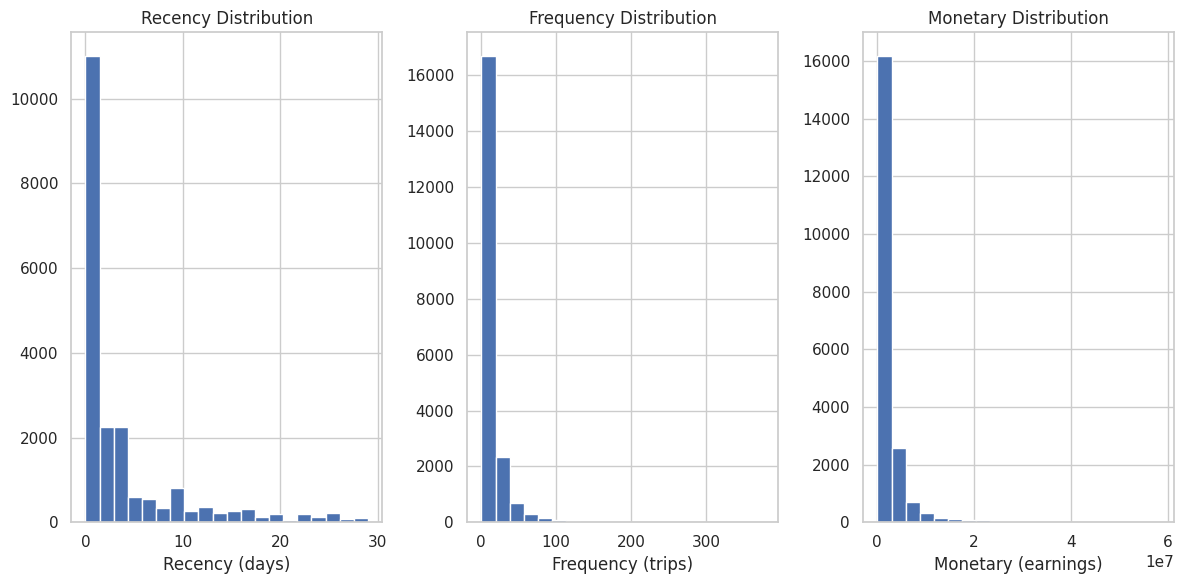

In [53]:
# Import necessary libraries
import pandas as pd

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter data for the month of April 2020
data_april = data[(data['create_time'].dt.year == 2020) & (data['create_time'].dt.month == 4)]

# Step 2: RFM Analysis for Bikers

# Group data by 'biker_id' to calculate recency, frequency, and monetary metrics
bikers_rfm = data_april[data_april['biker_id'].notnull()].groupby('biker_id').agg({
    'create_time': lambda x: (data_april['create_time'].max() - x.max()).days,  # Recency: Last day of April - Last trip date
    'order_id': 'nunique',  # Frequency: Number of unique trips
    'price': 'sum'  # Monetary: Total earnings from trips
})

# Rename columns for clarity
bikers_rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Step 3: Analysis of RFM Metrics for Bikers

# Print the RFM metrics for bikers
print("RFM Analysis for Bikers:")
print(bikers_rfm.head())

# Analyze the distribution of RFM metrics using descriptive statistics
print("\nDescriptive Statistics for RFM Metrics:")
print(bikers_rfm.describe())

# Visualize the RFM metrics distribution using histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(bikers_rfm['Recency'], bins=20)
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')

plt.subplot(132)
plt.hist(bikers_rfm['Frequency'], bins=20)
plt.title('Frequency Distribution')
plt.xlabel('Frequency (trips)')

plt.subplot(133)
plt.hist(bikers_rfm['Monetary'], bins=20)
plt.title('Monetary Distribution')
plt.xlabel('Monetary (earnings)')
plt.tight_layout()
plt.show()


The RFM analysis provides an overview of biker engagement and performance during April 2020. Bikers with a low Recency value (closer to 0) are more active and engaged, indicating recent activity. Higher Frequency values suggest bikers who made more trips, indicating more engaged and productive bikers.

The Monetary metric represents the earnings from trips, and higher values indicate bikers who earned more during the month. However, it's essential to consider that some bikers might have higher earnings due to longer trips or more deliveries.

The descriptive statistics provide insights into the distribution and spread of the RFM metrics across all bikers. For instance, the standard deviation shows how much the RFM metrics vary among the bikers.

# Segmentation Drivers using RFM

In [54]:
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter data for the month of April 2020
data_april = data[(data['create_time'].dt.year == 2020) & (data['create_time'].dt.month == 4)]

# Step 2: RFM Analysis for Bikers

# Group data by 'biker_id' to calculate recency, frequency, and monetary metrics
bikers_rfm = data_april[data_april['biker_id'].notnull()].groupby('biker_id').agg({
    'create_time': lambda x: (data_april['create_time'].max() - x.max()).days,  # Recency: Last day of April - Last trip date
    'order_id': 'nunique',  # Frequency: Number of unique trips
    'price': 'sum'  # Monetary: Total earnings from trips
})

# Rename columns for clarity
bikers_rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Step 3: Segmentation of Bikers based on RFM Scores

# Define the segmentation criteria for each RFM metric
recency_segments = pd.cut(bikers_rfm['Recency'], bins=[-1, 1, 7, float('inf')], labels=['Recent', 'Less Recent', 'Not Recent'])
frequency_segments = pd.cut(bikers_rfm['Frequency'], bins=[0, 5, 15, float('inf')], labels=['Low Frequency', 'Medium Frequency', 'High Frequency'])
monetary_segments = pd.cut(bikers_rfm['Monetary'], bins=[-1, 500000, 2000000, float('inf')], labels=['Low Monetary', 'Medium Monetary', 'High Monetary'])

# Combine the segments to create the RFM segment for each biker
bikers_rfm['RFM Segment'] = recency_segments.astype(str) + '-' + frequency_segments.astype(str) + '-' + monetary_segments.astype(str)

# Step 4: Print the RFM segments for bikers
print("RFM Segments for Bikers:")
print(bikers_rfm['RFM Segment'].value_counts())


RFM Segments for Bikers:
Recent-High Frequency-High Monetary             3255
Recent-Medium Frequency-Medium Monetary         2418
Less Recent-Low Frequency-Low Monetary          2354
Not Recent-Low Frequency-Low Monetary           2237
Recent-Low Frequency-Low Monetary               1669
Recent-Medium Frequency-High Monetary           1572
Recent-Low Frequency-Medium Monetary            1453
Less Recent-Low Frequency-Medium Monetary       1025
Less Recent-Medium Frequency-Medium Monetary     792
Less Recent-High Frequency-High Monetary         526
Recent-High Frequency-Medium Monetary            480
Less Recent-Medium Frequency-High Monetary       433
Not Recent-Low Frequency-Medium Monetary         427
Not Recent-Medium Frequency-Medium Monetary      387
Less Recent-High Frequency-Medium Monetary       329
Not Recent-Medium Frequency-Low Monetary         186
Not Recent-High Frequency-Medium Monetary        156
Less Recent-Medium Frequency-Low Monetary        129
Not Recent-Medium Fre

# Task 6 : The tricky Problem

In [71]:
import pandas as pd

def check_dataset_constraints(data):
    num_rows_meeting_constraints = 0
    total_rows = len(data)

    grouped_data = data.groupby('city')  # Group the data by city

    for city, city_data in grouped_data:
        group_a_gt_avg = city_data[city_data['AB_Testing'] == 'A']['GT'].mean()
        group_b_gt_avg = city_data[city_data['AB_Testing'] == 'B']['GT'].mean()
        group_a_biker_id_count = city_data[city_data['AB_Testing'] == 'A']['biker_id'].count()
        total_biker_id_count = city_data['biker_id'].count()

        if (0.96 < group_a_gt_avg / group_b_gt_avg < 0.99) and (0.50 < group_a_biker_id_count / total_biker_id_count < 0.90):
            num_rows_meeting_constraints += len(city_data)

    percentage_meeting_constraints = (num_rows_meeting_constraints / total_rows) * 100
    return percentage_meeting_constraints

# Assuming 'best_population_data' is the DataFrame containing the best population after the evolution
# Load data from CSV
best_population_data = pd.read_csv('best_population_data.csv')

# Calculate the percentage of rows meeting constraints for the final solution
percentage_meeting_constraints_final = check_dataset_constraints(best_population_data)
print(f"Percentage of Rows Meeting Constraints for the Final Solution: {percentage_meeting_constraints_final:.2f}%")


Percentage of Rows Meeting Constraints for the Final Solution: 91.01%


Enter the minimum percentage (e.g., 50): 50
Enter the maximum percentage (e.g., 90): 90
Generation 0 - Average Fitness: -4.12
Percentage of Rows Meeting Constraints: 15.03%
Generation 1 - Average Fitness: -5.49
Percentage of Rows Meeting Constraints: 83.89%
Generation 2 - Average Fitness: -6.30
Percentage of Rows Meeting Constraints: 71.06%
Generation 3 - Average Fitness: -6.88
Percentage of Rows Meeting Constraints: 80.98%
Generation 4 - Average Fitness: -7.43
Percentage of Rows Meeting Constraints: 80.98%
Generation 5 - Average Fitness: -7.73
Percentage of Rows Meeting Constraints: 71.30%
Generation 6 - Average Fitness: -8.39
Percentage of Rows Meeting Constraints: 79.44%
Generation 7 - Average Fitness: -8.54
Percentage of Rows Meeting Constraints: 86.75%
Generation 8 - Average Fitness: -8.82
Percentage of Rows Meeting Constraints: 86.75%
Generation 9 - Average Fitness: -8.98
Percentage of Rows Meeting Constraints: 86.75%
Generation 10 - Average Fitness: -8.82
Percentage of Rows Meet

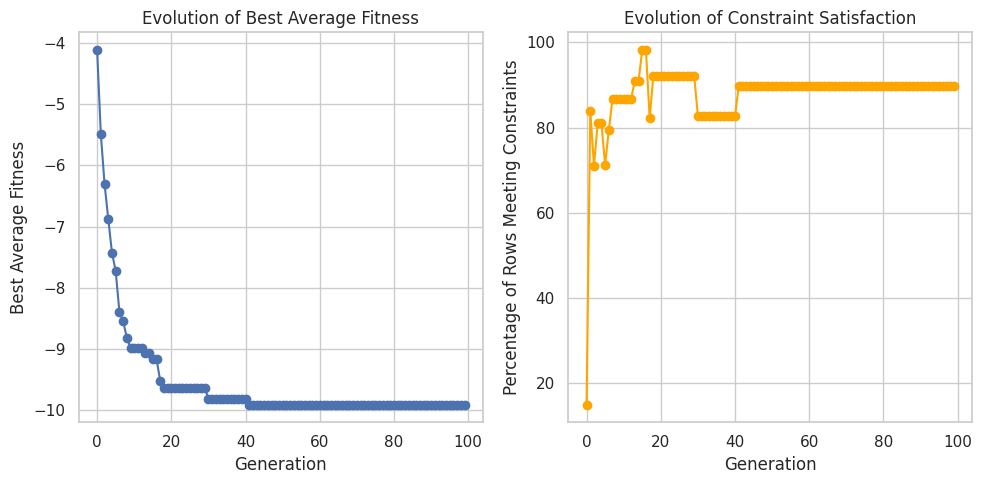

Percentage of Rows Meeting Constraints for the Final Solution: 91.01%


In [68]:
import random
import pandas as pd
import matplotlib.pyplot as plt

def check_constraints(individual, min_percentage, max_percentage):
    num_rows_meeting_constraints = 0
    total_rows = len(individual)

    for city in individual['city'].unique():
        city_data = individual[individual['city'] == city]
        group_a_gt_avg = city_data[city_data['AB_Testing'] == 'A']['GT'].mean()
        group_b_gt_avg = city_data[city_data['AB_Testing'] == 'B']['GT'].mean()
        group_a_biker_id_count = city_data[city_data['AB_Testing'] == 'A']['biker_id'].count()
        total_biker_id_count = city_data['biker_id'].count()

        if (0.96 < group_a_gt_avg / group_b_gt_avg < 0.99) and (min_percentage / 100 < group_a_biker_id_count / total_biker_id_count < max_percentage / 100):
            num_rows_meeting_constraints += len(city_data)

    percentage_meeting_constraints = (num_rows_meeting_constraints / total_rows) * 100
    return percentage_meeting_constraints

def plot_performance_metrics(best_average_fitness_list, percentage_meeting_constraints_list):
    generations = list(range(len(best_average_fitness_list)))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(generations, best_average_fitness_list, marker='o')
    plt.xlabel('Generation')
    plt.ylabel('Best Average Fitness')
    plt.title('Evolution of Best Average Fitness')

    plt.subplot(1, 2, 2)
    plt.plot(generations, percentage_meeting_constraints_list, marker='o', color='orange')
    plt.xlabel('Generation')
    plt.ylabel('Percentage of Rows Meeting Constraints')
    plt.title('Evolution of Constraint Satisfaction')

    plt.tight_layout()
    plt.show()


# Function to get the user input for minimum and maximum percentage for the second constraint
def get_biker_id_percentage_range():
    min_percentage = float(input("Enter the minimum percentage (e.g., 50): "))
    max_percentage = float(input("Enter the maximum percentage (e.g., 90): "))
    return min_percentage, max_percentage

# Function to create the initial population
def create_initial_population(data, population_size):
    population = []
    for _ in range(population_size):
        individual = data.copy()
        individual['AB_Testing'] = [random.choice(['A', 'B']) for _ in range(len(data))]
        population.append(individual)
    return population

def calculate_fitness(individual, min_percentage, max_percentage):
    # Group the data by 'city' and 'AB_Testing' to calculate averages and counts
    grouped_data = individual.groupby(['city', 'AB_Testing'])

    # Calculate the average 'GT' for each group 'A' and 'B' in each city
    averages = grouped_data['GT'].mean().unstack(fill_value=0)

    # Calculate the total 'biker_id' count for each group 'A' and total count for each city
    counts = grouped_data['biker_id'].count().unstack(fill_value=0)
    total_counts = grouped_data['biker_id'].count().groupby('city').sum()

    # Calculate the fitness based on the percentage constraints
    fitness = 0
    for city in averages.index:
        if 'A' in averages.columns and 'B' in averages.columns:
            avg_group_a = averages.at[city, 'A']
            avg_group_b = averages.at[city, 'B']
            count_group_a = counts.at[city, 'A']
            total_count = total_counts.at[city]

            if 0.96 < avg_group_a / avg_group_b < 0.99:
                fitness += 1  # Increment fitness if constraint 1 is satisfied
            if min_percentage / 100 < count_group_a / total_count < max_percentage / 100:
                fitness += 1  # Increment fitness if constraint 2 is satisfied

    # Subtract the fitness from the total number of constraints (2 in this case)
    # to encourage individuals that meet both constraints.
    num_constraints = 2
    fitness = num_constraints - fitness

    return fitness


# Function for selection (tournament selection)
def select_individuals(population, tournament_size):
    selected_individuals = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        selected_individuals.append(min(tournament, key=lambda ind: calculate_fitness(ind,min_percentage, max_percentage)))
    return selected_individuals

# Function for crossover
def crossover(parent1, parent2, crossover_rate):
    if random.random() < crossover_rate:
        crossover_point = random.randint(0, len(parent1))
        child1 = pd.concat([parent1.iloc[:crossover_point], parent2.iloc[crossover_point:]])
        child2 = pd.concat([parent2.iloc[:crossover_point], parent1.iloc[crossover_point:]])
        return child1, child2
    else:
        return parent1, parent2

# Function for mutation
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual.at[i, 'AB_Testing'] = random.choice(['A', 'B'])
    return individual

def evolve_population(data, population_size, tournament_size, crossover_rate, mutation_rate, num_generations, min_percentage, max_percentage):
    population = create_initial_population(data, population_size)
    best_generation_population = []  # List to store the best generation's population
    best_average_fitness = float('inf')  # Initialize with a high value to find the lowest average fitness

    # Lists to store performance metrics
    best_average_fitness_list = []
    percentage_meeting_constraints_list = []

    for generation in range(num_generations):
        fitness_values = []
        for individual in population:
            individual_fitness = calculate_fitness(individual, min_percentage, max_percentage)
            fitness_values.append(individual_fitness)

        average_fitness = sum(fitness_values) / len(fitness_values)
        print(f"Generation {generation} - Average Fitness: {average_fitness:.2f}")

        if average_fitness < best_average_fitness:
            best_average_fitness = average_fitness
            best_generation_population = population.copy()
            best_individual = min(best_generation_population, key=lambda ind: calculate_fitness(ind, min_percentage, max_percentage))
            data['AB_Testing'] = best_individual['AB_Testing']  # Temporarily fill the dataset with the best individual's AB_Testing

        # Calculate the percentage of rows meeting constraints for the entire dataset in each generation
        percentage_meeting_constraints = check_constraints(data, min_percentage, max_percentage)
        print(f"Percentage of Rows Meeting Constraints: {percentage_meeting_constraints:.2f}%")

        # Store performance metrics for each generation
        best_average_fitness_list.append(best_average_fitness)
        percentage_meeting_constraints_list.append(percentage_meeting_constraints)

        selected_individuals = select_individuals(population, tournament_size)
        new_population = []

        # Add elitism - Preserve the best individual from the previous generation
        best_individual = min(population, key=lambda ind: calculate_fitness(ind, min_percentage, max_percentage))
        new_population.append(best_individual)

        for i in range(0, len(selected_individuals) - 1, 2):
            child1, child2 = crossover(selected_individuals[i], selected_individuals[i+1], crossover_rate)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.append(child1)
            new_population.append(child2)

        population = new_population

    # Save the best individual from the final generation
    best_individual = min(best_generation_population, key=lambda ind: calculate_fitness(ind, min_percentage, max_percentage))

    # Update the main dataset with the best individual's AB_Testing
    data['AB_Testing'] = best_individual['AB_Testing']

    # Plot the performance metrics
    plot_performance_metrics(best_average_fitness_list, percentage_meeting_constraints_list)

    return data

# Load data from CSV
data = pd.read_csv('/content/dataset_ABtesting.csv')

# Get user input for minimum and maximum percentage for the second constraint
min_percentage, max_percentage = get_biker_id_percentage_range()

# Parameters for genetic algorithm
population_size = 200
tournament_size = 5
crossover_rate = 0.8
mutation_rate = 0.03
num_generations = 100



best_population_data = evolve_population(data, population_size, tournament_size, crossover_rate, mutation_rate, num_generations, min_percentage, max_percentage)

# Calculate the percentage of rows meeting constraints for the final solution
percentage_meeting_constraints_final = check_constraints(best_population_data,min_percentage, max_percentage)
print(f"Percentage of Rows Meeting Constraints for the Final Solution: {percentage_meeting_constraints_final:.2f}%")

# Save the best population data to a CSV file
best_population_data.to_csv('best_population_data.csv', index=False)


In [69]:
import pandas as pd

def check_constraints(data):
    num_rows_meeting_constraints = 0
    total_rows = len(data)

    for city in data['city'].unique():
        city_data = data[data['city'] == city]
        group_a_gt_avg = city_data[city_data['AB_Testing'] == 'A']['GT'].mean()
        group_b_gt_avg = city_data[city_data['AB_Testing'] == 'B']['GT'].mean()
        group_a_biker_id_count = city_data[city_data['AB_Testing'] == 'A']['biker_id'].count()
        total_biker_id_count = city_data['biker_id'].count()

        if (0.96 < group_a_gt_avg / group_b_gt_avg < 0.99) and (0.5 < group_a_biker_id_count / total_biker_id_count < 0.95):
            num_rows_meeting_constraints += len(city_data)

    percentage_meeting_constraints = (num_rows_meeting_constraints / total_rows) * 100
    return percentage_meeting_constraints

if __name__ == "__main__":
    # Load data from CSV
    data = pd.read_csv('/content/best_population_data.csv')

    # Check constraints for each row and each city
    percentage_meeting_constraints = check_constraints(data)

    print(f"Percentage of Rows Meeting Constraints: {percentage_meeting_constraints:.2f}%")


Percentage of Rows Meeting Constraints: 91.01%


In [93]:
best_population_data = pd.read_csv('best_population_data.csv')

# Calculate the percentage of rows meeting constraints for the final solution
percentage_meeting_constraints_final = check_dataset_constraints(best_population_data)
print(f"Percentage of Rows Meeting Constraints for the Final Solution: {percentage_meeting_constraints_final:.2f}%")

Percentage of Rows Meeting Constraints for the Final Solution: 91.01%


# Performing Grid Search for tuning  parameters

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

def check_constraints(individual, min_percentage, max_percentage):
    num_rows_meeting_constraints = 0
    total_rows = len(individual)

    for city in individual['city'].unique():
        city_data = individual[individual['city'] == city]
        group_a_gt_avg = city_data[city_data['AB_Testing'] == 'A']['GT'].mean()
        group_b_gt_avg = city_data[city_data['AB_Testing'] == 'B']['GT'].mean()
        group_a_biker_id_count = city_data[city_data['AB_Testing'] == 'A']['biker_id'].count()
        total_biker_id_count = city_data['biker_id'].count()

        if (0.96 < group_a_gt_avg / group_b_gt_avg < 0.99) and (min_percentage / 100 < group_a_biker_id_count / total_biker_id_count < max_percentage / 100):
            num_rows_meeting_constraints += len(city_data)

    percentage_meeting_constraints = (num_rows_meeting_constraints / total_rows) * 100
    return percentage_meeting_constraints

def plot_performance_metrics(best_average_fitness_list, percentage_meeting_constraints_list):
    generations = list(range(len(best_average_fitness_list)))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(generations, best_average_fitness_list, marker='o')
    plt.xlabel('Generation')
    plt.ylabel('Best Average Fitness')
    plt.title('Evolution of Best Average Fitness')

    plt.subplot(1, 2, 2)
    plt.plot(generations, percentage_meeting_constraints_list, marker='o', color='orange')
    plt.xlabel('Generation')
    plt.ylabel('Percentage of Rows Meeting Constraints')
    plt.title('Evolution of Constraint Satisfaction')

    plt.tight_layout()
    plt.show()


# Function to get the user input for minimum and maximum percentage for the second constraint
def get_biker_id_percentage_range():
    min_percentage = float(input("Enter the minimum percentage (e.g., 50): "))
    max_percentage = float(input("Enter the maximum percentage (e.g., 90): "))
    return min_percentage, max_percentage

# Function to create the initial population
def create_initial_population(data, population_size):
    population = []
    for _ in range(population_size):
        individual = data.copy()
        individual['AB_Testing'] = [random.choice(['A', 'B']) for _ in range(len(data))]
        population.append(individual)
    return population

def calculate_fitness(individual, min_percentage, max_percentage):
    # Group the data by 'city' and 'AB_Testing' to calculate averages and counts
    grouped_data = individual.groupby(['city', 'AB_Testing'])

    # Calculate the average 'GT' for each group 'A' and 'B' in each city
    averages = grouped_data['GT'].mean().unstack(fill_value=0)

    # Calculate the total 'biker_id' count for each group 'A' and total count for each city
    counts = grouped_data['biker_id'].count().unstack(fill_value=0)
    total_counts = grouped_data['biker_id'].count().groupby('city').sum()

    # Calculate the fitness based on the percentage constraints
    fitness = 0
    for city in averages.index:
        if 'A' in averages.columns and 'B' in averages.columns:
            avg_group_a = averages.at[city, 'A']
            avg_group_b = averages.at[city, 'B']
            count_group_a = counts.at[city, 'A']
            total_count = total_counts.at[city]

            if 0.96 < avg_group_a / avg_group_b < 0.99:
                fitness += 1  # Increment fitness if constraint 1 is satisfied
            if min_percentage / 100 < count_group_a / total_count < max_percentage / 100:
                fitness += 1  # Increment fitness if constraint 2 is satisfied

    # Subtract the fitness from the total number of constraints (2 in this case)
    # to encourage individuals that meet both constraints.
    num_constraints = 2
    fitness = num_constraints - fitness

    return fitness


# Function for selection (tournament selection)
def select_individuals(population, tournament_size):
    selected_individuals = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        selected_individuals.append(min(tournament, key=lambda ind: calculate_fitness(ind,min_percentage, max_percentage)))
    return selected_individuals

# Function for crossover
def crossover(parent1, parent2, crossover_rate):
    if random.random() < crossover_rate:
        crossover_point = random.randint(0, len(parent1))
        child1 = pd.concat([parent1.iloc[:crossover_point], parent2.iloc[crossover_point:]])
        child2 = pd.concat([parent2.iloc[:crossover_point], parent1.iloc[crossover_point:]])
        return child1, child2
    else:
        return parent1, parent2

# Function for mutation
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual.at[i, 'AB_Testing'] = random.choice(['A', 'B'])
    return individual

def evolve_population(data, population_size, tournament_size, crossover_rate, mutation_rate, num_generations, min_percentage, max_percentage):
    population = create_initial_population(data, population_size)
    best_generation_population = []  # List to store the best generation's population
    best_average_fitness = float('inf')  # Initialize with a high value to find the lowest average fitness

    # Lists to store performance metrics
    best_average_fitness_list = []
    percentage_meeting_constraints_list = []

    for generation in range(num_generations):
        fitness_values = []
        for individual in population:
            individual_fitness = calculate_fitness(individual, min_percentage, max_percentage)
            fitness_values.append(individual_fitness)

        average_fitness = sum(fitness_values) / len(fitness_values)
        print(f"Generation {generation} - Average Fitness: {average_fitness:.2f}")

        if average_fitness < best_average_fitness:
            best_average_fitness = average_fitness
            best_generation_population = population.copy()
            best_individual = min(best_generation_population, key=lambda ind: calculate_fitness(ind, min_percentage, max_percentage))
            data['AB_Testing'] = best_individual['AB_Testing']  # Temporarily fill the dataset with the best individual's AB_Testing

        # Calculate the percentage of rows meeting constraints for the entire dataset in each generation
        percentage_meeting_constraints = check_constraints(data, min_percentage, max_percentage)
        print(f"Percentage of Rows Meeting Constraints: {percentage_meeting_constraints:.2f}%")

        # Store performance metrics for each generation
        best_average_fitness_list.append(best_average_fitness)
        percentage_meeting_constraints_list.append(percentage_meeting_constraints)

        selected_individuals = select_individuals(population, tournament_size)
        new_population = []

        # Add elitism - Preserve the best individual from the previous generation
        best_individual = min(population, key=lambda ind: calculate_fitness(ind, min_percentage, max_percentage))
        new_population.append(best_individual)

        for i in range(0, len(selected_individuals) - 1, 2):
            child1, child2 = crossover(selected_individuals[i], selected_individuals[i+1], crossover_rate)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.append(child1)
            new_population.append(child2)

        population = new_population

    # Save the best individual from the final generation
    best_individual = min(best_generation_population, key=lambda ind: calculate_fitness(ind, min_percentage, max_percentage))

    # Update the main dataset with the best individual's AB_Testing
    data['AB_Testing'] = best_individual['AB_Testing']

    # Plot the performance metrics
    plot_performance_metrics(best_average_fitness_list, percentage_meeting_constraints_list)

    return data

def grid_search(data, min_percentage_range, max_percentage_range, population_size_range, tournament_size_range, crossover_rate_range, mutation_rate_range, num_generations_range):
    best_percentage_meeting_constraints = 0
    best_parameters = {}

    for (min_percentage, max_percentage, population_size, tournament_size, crossover_rate, mutation_rate, num_generations) in product(min_percentage_range, max_percentage_range, population_size_range, tournament_size_range, crossover_rate_range, mutation_rate_range, num_generations_range):
        print(f"\nRunning Genetic Algorithm with Parameters:")
        print(f"Min Percentage: {min_percentage}")
        print(f"Max Percentage: {max_percentage}")
        print(f"Population Size: {population_size}")
        print(f"Tournament Size: {tournament_size}")
        print(f"Crossover Rate: {crossover_rate}")
        print(f"Mutation Rate: {mutation_rate}")
        print(f"Number of Generations: {num_generations}")

        best_population_data = evolve_population(data, population_size, tournament_size, crossover_rate, mutation_rate, num_generations, min_percentage, max_percentage)

        # Calculate the percentage of rows meeting constraints for the final solution
        percentage_meeting_constraints_final = check_constraints(best_population_data, min_percentage, max_percentage)
        print(f"Percentage of Rows Meeting Constraints for the Final Solution: {percentage_meeting_constraints_final:.2f}%")

        if percentage_meeting_constraints_final > best_percentage_meeting_constraints:
            best_percentage_meeting_constraints = percentage_meeting_constraints_final
            best_parameters = {
                'min_percentage': min_percentage,
                'max_percentage': max_percentage,
                'population_size': population_size,
                'tournament_size': tournament_size,
                'crossover_rate': crossover_rate,
                'mutation_rate': mutation_rate,
                'num_generations': num_generations
            }

    print("\nGrid Search Results:")
    print("Best Parameters:")
    print(best_parameters)
    print(f"Best Percentage of Rows Meeting Constraints: {best_percentage_meeting_constraints:.2f}%")

    return best_parameters


# Load data from CSV
data = pd.read_csv('/content/dataset_ABtesting.csv')

# Define the parameter grid for Grid Search
min_percentage_range = [50, 60, 70, 80]
max_percentage_range = [80, 85, 90]
population_size_range = [50, 100, 150]
tournament_size_range = [3, 5, 7]
crossover_rate_range = [0.7, 0.8, 0.9]
mutation_rate_range = [0.01, 0.02, 0.03]
num_generations_range = [30, 40, 50]

# Perform Grid Search
best_parameters = grid_search(data, min_percentage_range, max_percentage_range, population_size_range, tournament_size_range, crossover_rate_range, mutation_rate_range, num_generations_range)

# Use the best parameters to run the final genetic algorithm
best_population_data = evolve_population(data, best_parameters['population_size'], best_parameters['tournament_size'], best_parameters['crossover_rate'], best_parameters['mutation_rate'], best_parameters['num_generations'], best_parameters['min_percentage'], best_parameters['max_percentage'])

# Save the best population data to a CSV file
best_population_data.to_csv('gridy_result.csv', index=False)

# simulated_annealing

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset (assuming the data is stored in a CSV file named "data.csv")
df = pd.read_csv('/content/dataset_ABtesting.csv')

# Define the objective function to be minimized (negative of the fitness function)
def objective_function(data):
    # Group the data by 'city' and 'AB_Testing' to calculate averages and counts
    grouped_data = data.dropna(subset=['city']).groupby(['city', 'AB_Testing'])

    # Calculate the average 'GT' for each group 'A' and 'B' in each city
    averages = grouped_data['GT'].mean().unstack(fill_value=0)

    # Calculate the total 'biker_id' count for each group 'A' and total count for each city
    counts = grouped_data['biker_id'].count().unstack(fill_value=0)
    total_counts = grouped_data['biker_id'].count().groupby('city').sum()

    # Calculate the fitness based on the percentage constraints
    fitness = 0
    for city in averages.index:
        if 'A' in averages.columns and 'B' in averages.columns:
            avg_group_a = averages.at[city, 'A']
            avg_group_b = averages.at[city, 'B']
            count_group_a = counts.at[city, 'A']
            total_count = total_counts.at[city]

            if 0.96 < avg_group_a / avg_group_b < 0.99:
                fitness += 1  # Increment fitness if constraint 1 is satisfied
            if 0.5 < count_group_a / total_count < 0.9:
                fitness += 1  # Increment fitness if constraint 2 is satisfied

    # Subtract the fitness from the total number of constraints (2 in this case)
    # to encourage individuals that meet both constraints.
    num_constraints = 2
    fitness = num_constraints - fitness

    return -fitness

# Simulated Annealing function with SAR (Simulated Annealing with Restart)
def simulated_annealing(data, initial_temperature, cooling_rate, iterations, restarts):
    best_solution = None
    best_objective = float('inf')

    for restart in range(restarts):
        # Initialize the 'AB_Testing' column randomly with 'A' or 'B' at the beginning
        data['AB_Testing'] = np.random.choice(['A', 'B'], size=len(data))

        current_solution = (data['AB_Testing'] == 'B').astype(int)  # 0: 'A', 1: 'B'
        current_objective = objective_function(data)

        for i in range(iterations):
            # Generate a neighbor solution by randomly selecting a row and flipping its AB_Testing value
            neighbor_solution = current_solution.copy()
            rand_row_idx = np.random.randint(len(neighbor_solution))
            neighbor_solution[rand_row_idx] = 1 - neighbor_solution[rand_row_idx]  # Flip the value (0 to 1 or 1 to 0)

            # Convert numerical solution back to the original string representation
            neighbor_solution_strings = np.where(neighbor_solution == 0, 'A', 'B')

            # Update the 'AB_Testing' column in the DataFrame with the neighbor solution
            data['AB_Testing'] = neighbor_solution_strings

            # Calculate the objective value for the neighbor solution
            neighbor_objective = objective_function(data)

            # Decide whether to accept the neighbor solution
            if neighbor_objective < current_objective or (initial_temperature > 0 and np.random.rand() < np.exp((current_objective - neighbor_objective) / initial_temperature)):
                current_solution = neighbor_solution
                current_objective = neighbor_objective

            # Update the best solution if needed
            if neighbor_objective < best_objective:
                best_solution = neighbor_solution
                best_objective = neighbor_objective

            # Cooling the temperature for the next iteration
            initial_temperature *= cooling_rate

            # Check if the temperature has become zero or less
            if initial_temperature <= 0:
                break

            # Print the current iteration and objective value
            print(f"Iteration {i + 1}/{iterations}, Objective Value: {best_objective:.6f}")

    return best_solution

# Parameters for Simulated Annealing with SAR
initial_temperature = 1000
cooling_rate = 0.80
iterations = 100000
restarts = 10  # Perform 10 restarts with different initial solutions

# Call the simulated_annealing function to find the best solution
best_solution = simulated_annealing(df, initial_temperature, cooling_rate, iterations, restarts)

# Convert numerical solution back to the original string representation
best_solution_strings = np.where(best_solution == 0, 'A', 'B')

# Update the 'AB_Testing' column in the DataFrame with the best solution
df['AB_Testing'] = best_solution_strings

# Save the optimized DataFrame back to the CSV file
df.to_csv('optimized_data.csv', index=False)